In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
origianl_df = pd.read_csv('CarPricePrediction.csv')
df = origianl_df.copy()
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [24]:
df.isna().sum()
df = df.dropna()

In [25]:
df.isna().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [26]:
df.duplicated().unique()

array([False])

In [27]:
df = pd.get_dummies(df,columns=['make','fuel-type','aspiration','num-of-doors','body-style','drive-wheels','engine-location','engine-type',
                                'num-of-cylinders','fuel-system'])

In [28]:
# sns.pairplot(data=df,hue='price')
# plt.show()

In [29]:
X = df.drop('price',axis=1)
y = df['price']
df_unique = df.copy()
for col in df.columns:
    df_unique[col] = pd.Series(df[col].unique())
df_unique.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,num-of-cylinders_five,num-of-cylinders_four,num-of-cylinders_six,num-of-cylinders_three,fuel-system_1bbl,fuel-system_2bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi
3,-1.0,188.0,101.2,141.1,64.8,53.2,3086.0,108.0,3.31,3.03,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3.0,121.0,88.4,155.9,60.3,52.0,2395.0,164.0,2.91,3.11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,81.0,93.7,157.3,63.8,50.6,2765.0,90.0,2.97,3.39,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,148.0,95.9,173.2,66.3,50.2,1874.0,122.0,3.60,3.90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,145.0,96.5,150.0,64.0,54.5,1876.0,92.0,3.15,3.07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [31]:
def metrics(y_test,y_pred):
    MAE = mean_absolute_error(y_test,y_pred)
    MSE = mean_squared_error(y_test,y_pred)
    RSME = np.sqrt(MSE)

    MAE_percentage = MAE*100/y.mean()
    RSME_percentage = RSME*100/y.mean()

    print(f'MAE: {MAE}, percentege: {MAE_percentage}\n RSME: {RSME}, percentage: {RSME_percentage}')

# Simple Decision Tree Machine Learning:

In [32]:
from sklearn.tree import DecisionTreeRegressor,plot_tree
tree_model = DecisionTreeRegressor()
tree_model.fit(X_train,y_train)

DecisionTreeRegressor()

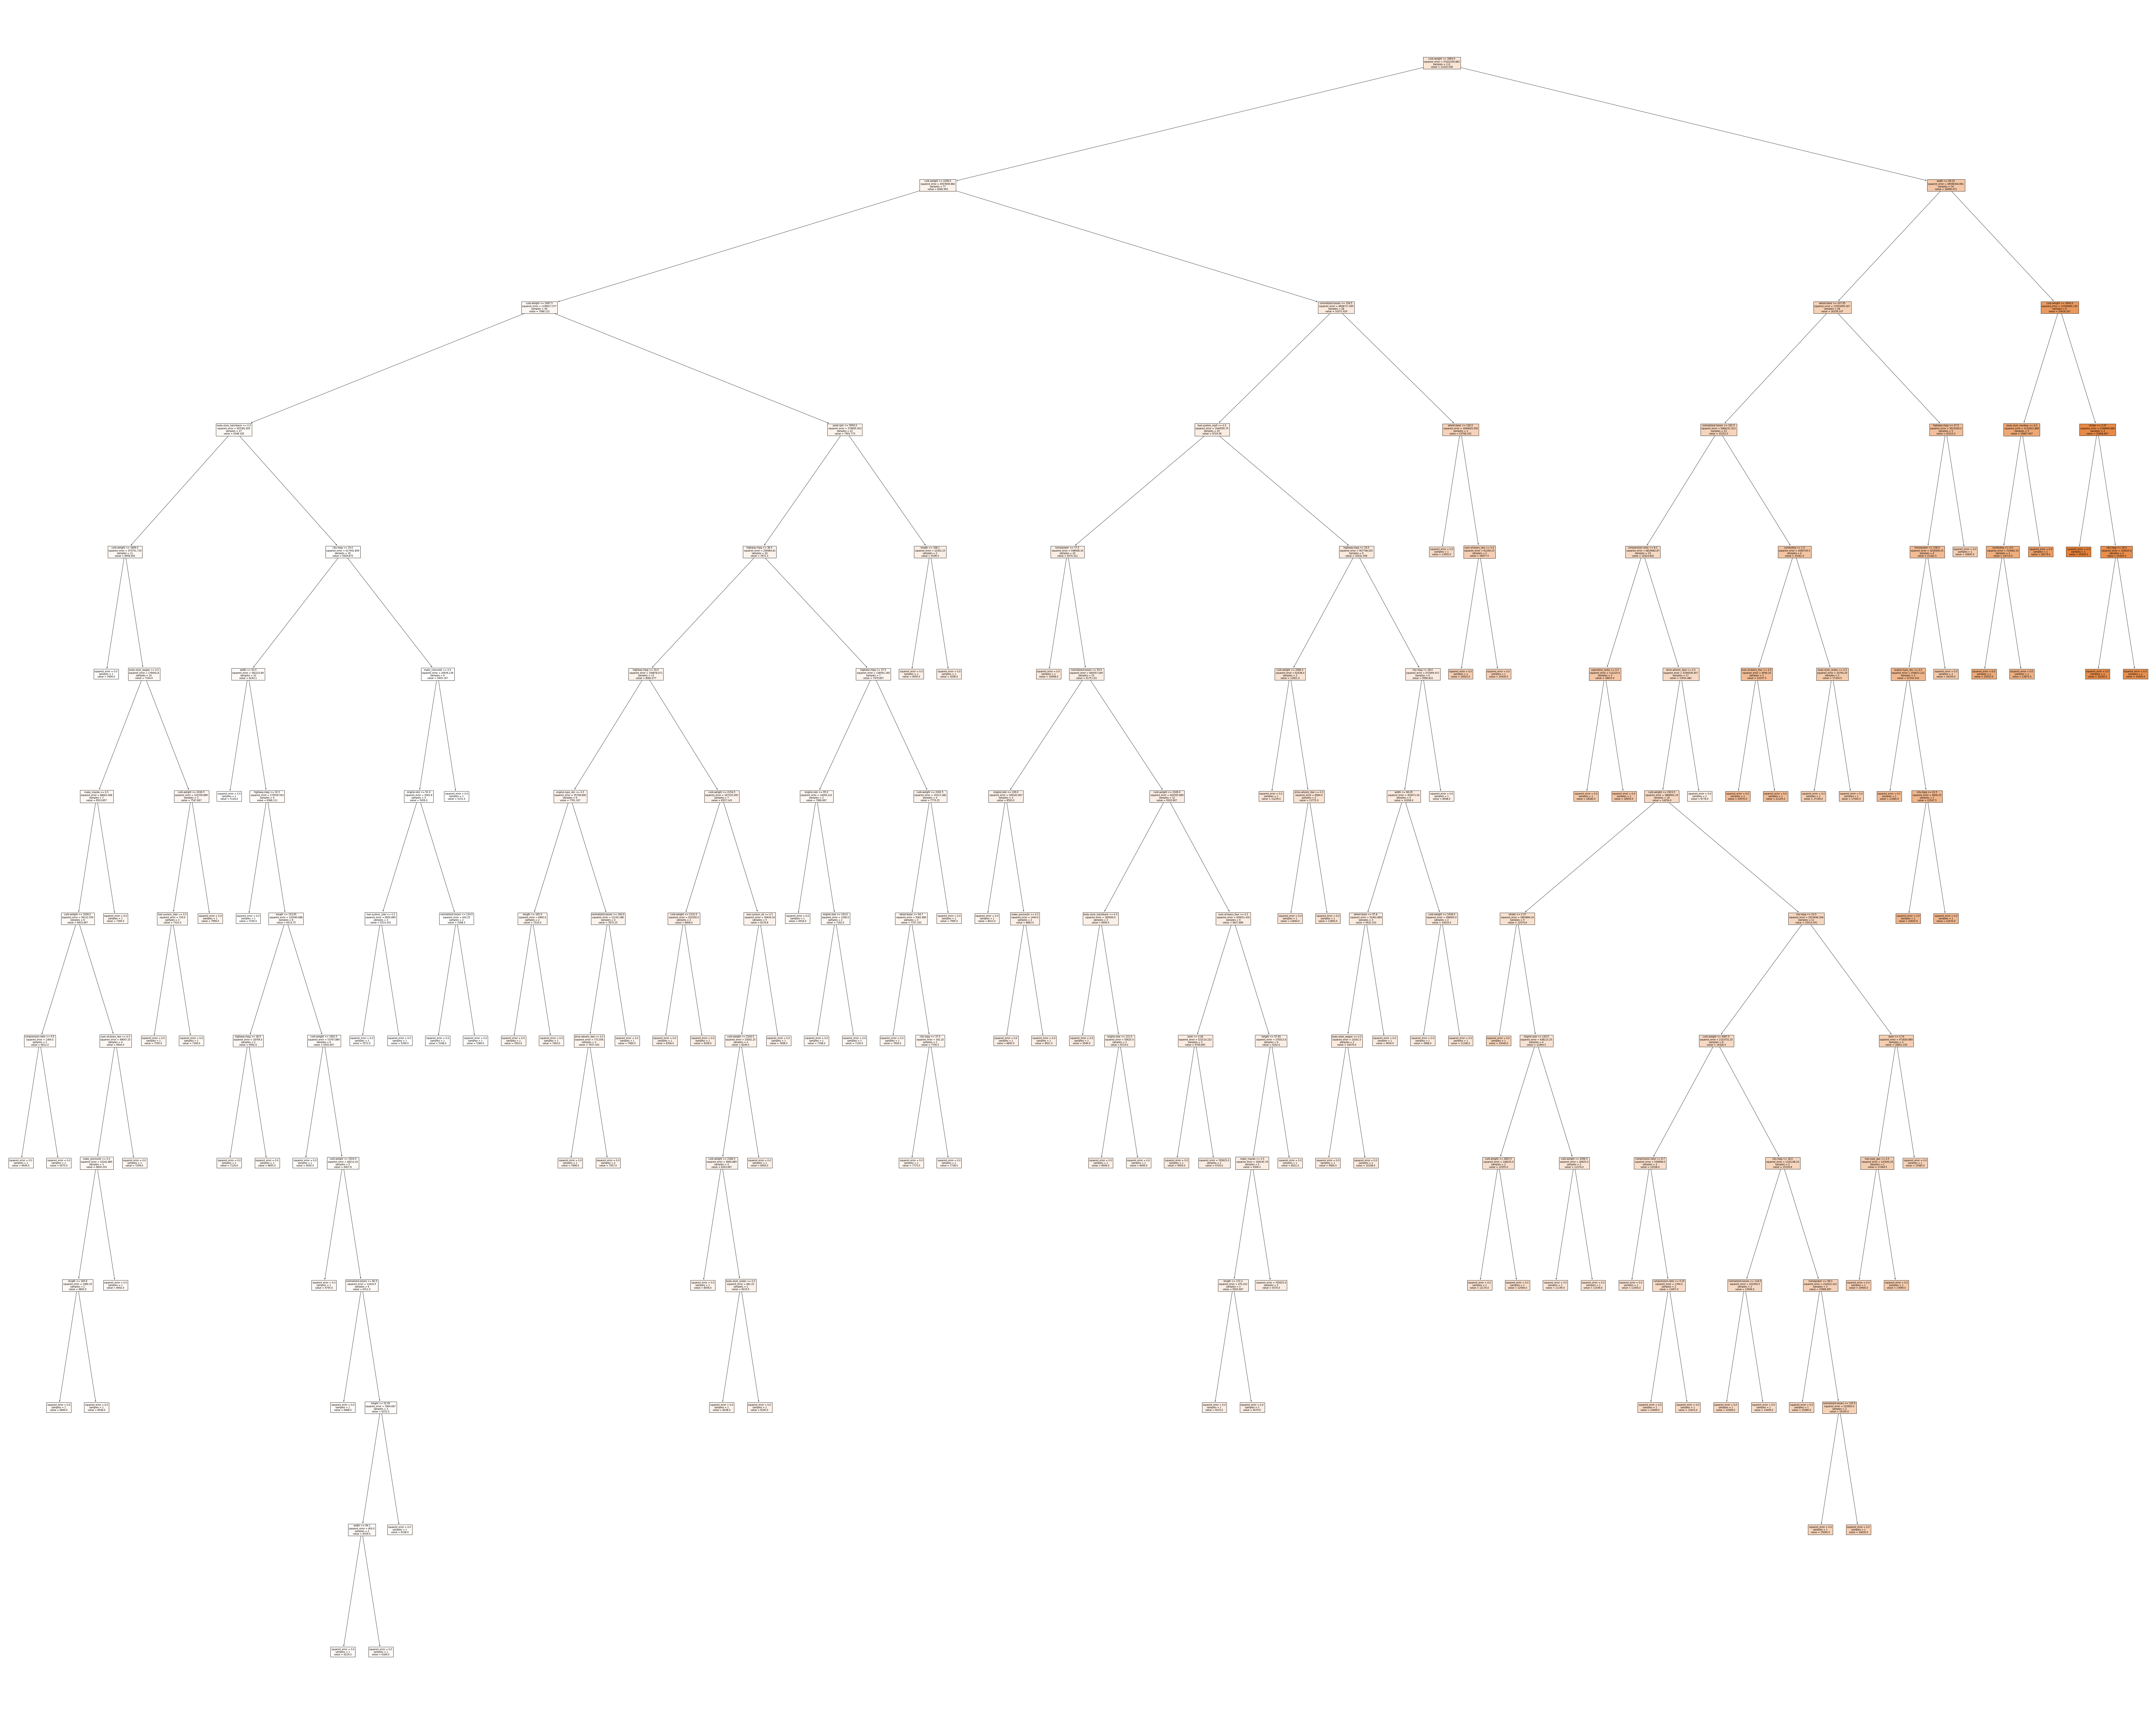

In [33]:
plt.figure(figsize=(150,120), dpi=50)
plot_tree(tree_model, feature_names=X.columns.tolist(), filled=True)
plt.show()

# Based on the number of features (20+) and the depth of the tree (12) there maybe overfitting while the gini imprurity is 0

In [34]:
tree_model.feature_importances_

array([3.66013881e-03, 4.21126243e-02, 2.65937252e-02, 1.54947141e-04,
       2.09847472e-01, 3.24619206e-05, 6.74002329e-01, 4.98316109e-04,
       2.80398619e-04, 3.39750738e-03, 9.84589907e-03, 3.53180698e-03,
       7.69250024e-04, 5.53405442e-03, 6.12359155e-03, 0.00000000e+00,
       0.00000000e+00, 1.86760826e-05, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 6.83360098e-05, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 7.21694826e-06, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 7.12344438e-05, 0.00000000e+00,
       5.40738091e-05, 1.52041896e-04, 6.98834618e-05, 0.00000000e+00,
       1.92555381e-03, 1.77284071e-03, 7.81173205e-06, 2.10060902e-04,
       6.79931707e-03, 3.49056536e-06, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 2.18941528e-04, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [35]:
y_pred = tree_model.predict(X_test)
metrics(y_test,y_pred)

MAE: 1682.2708333333333, percentege: 14.697803443211082
 RSME: 2366.178340172186, percentage: 20.67302331249729


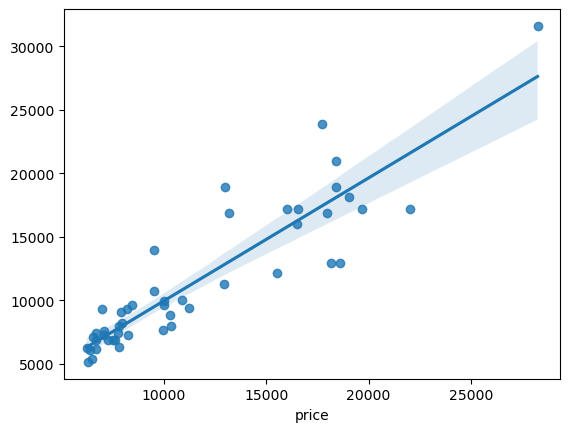

In [36]:
sns.regplot(x=y_test,y=y_pred)
plt.show()

# Optimal Decision Tree Machine Learning:

In [37]:
len(X_train)

111

In [38]:
from sklearn.model_selection import GridSearchCV
max_depth = [4,5,6,7,8]
min_samples_split = [4,6,10,14,18,22]
max_leaf_nodes = [20,35,50]
params = {'max_depth':max_depth,'min_samples_split':min_samples_split,'max_leaf_nodes':max_leaf_nodes}
tree_model = DecisionTreeRegressor()
grid_model = GridSearchCV(tree_model,params,scoring='neg_mean_squared_error')
grid_model.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [4, 5, 6, 7, 8],
                         'max_leaf_nodes': [20, 35, 50],
                         'min_samples_split': [4, 6, 10, 14, 18, 22]},
             scoring='neg_mean_squared_error')

In [39]:
tree_model = DecisionTreeRegressor(max_depth=5,max_leaf_nodes=35,min_samples_split=4)
tree_model.fit(X_train,y_train)
y_pred = tree_model.predict(X_test)
metrics(y_test,y_pred)

MAE: 1634.7025771205917, percentege: 14.282205154221046
 RSME: 2421.3459923728983, percentage: 21.15501663509616


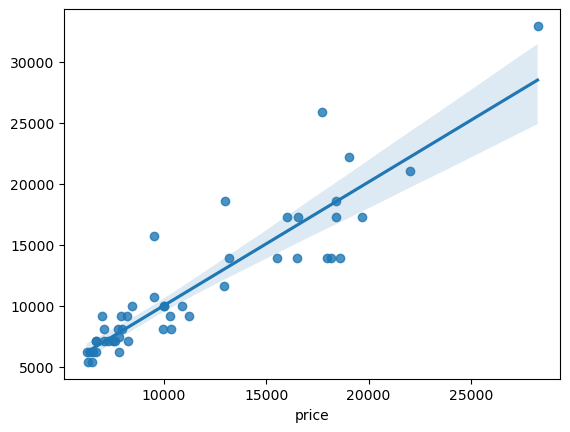

In [40]:
sns.regplot(x=y_test,y=y_pred)
plt.show()

# Optimal Random Forest Machine Learning:

In [ ]:
from sklearn.ensemble import RandomForestRegressor
max_depth = [5,6,7,8,9]
n_estimators = [50,100,150]
max_features = [5,6,7,8,9]
bootstrap = [True,False]
max_leaf_nodes = [10,15,20,25,30]
min_samples_split = [2,3,4,5,8,10,15,20,25]
min_impurity_decrease = [0.01,0.03,0.05,0.1]
params = {'n_estimators':n_estimators,
          'max_depth': max_depth,
          'max_features':max_features,
          'bootstrap':bootstrap,
          'min_samples_split':min_samples_split,
          'max_leaf_nodes':max_leaf_nodes,'min_impurity_decrease':min_impurity_decrease}
forset_model = RandomForestRegressor()
gridCV = GridSearchCV(forset_model,params,scoring='neg_mean_squared_error',n_jobs=2)
gridCV.fit(X_train,y_train)


In [ ]:
gridCV.best_estimator_

In [ ]:
optimal_forest_model = RandomForestRegressor(n_estimators=50,max_features=7,max_depth=7,max_leaf_nodes=30,min_samples_split=4,min_impurity_decrease=0.05)
optimal_forest_model.fit(X_train,y_train)
y_pred = optimal_forest_model.predict(X_test)
metrics(y_test,y_pred)
sns.regplot(x=y_test,y=y_pred)
plt.xlabel('Test')
plt.ylabel('Predictions')
plt.title('Test vs Predictions')
plt.show()

# Model Deployment:

In [ ]:
from joblib import dump,load
final_forest_model = RandomForestRegressor(n_estimators=120,max_features=9,bootstrap=False,min_samples_split=4)
final_forest_model.fit(X,y)
dump(final_forest_model,'final_forest_model.joblib')
loaded_model = load('final_forest_model.joblib')
new_data = pd.DataFrame({
'symboling': [1, 2],
'normalized-losses': [95, 84],
'make': ['toyota', 'honda'],
'fuel-type': ['gas', 'gas'],
'aspiration': ['std', 'std'],
'num-of-doors': ['four', 'four'],
'body-style': ['sedan', 'hatchback'],
'drive-wheels': ['fwd', 'fwd'],
'engine-location': ['front', 'front'],
'wheel-base': [98.0, 96.5],
'length': [176.2, 167.0],
'width': [66.5, 65.4],
'height': [54.3, 52.6],
'curb-weight': [2579, 2204],
'engine-type': ['ohc', 'ohc'],
'num-of-cylinders': ['four', 'four'],
'engine-size': [108, 97],
'fuel-system': ['mpfi', '2bbl'],
'bore': [3.50, 3.19],
'stroke': [2.80, 3.03],
'compression-ratio': [8.8, 9.6],
'horsepower': [75, 76],
'peak-rpm': [5000, 6000],
'city-mpg': [30, 30],
'highway-mpg': [38, 34]
})
new_data = pd.get_dummies(new_data,columns=['make','fuel-type','aspiration','num-of-doors','body-style','drive-wheels','engine-location','engine-type','num-of-cylinders','fuel-system'])
pred = loaded_model.predict(new_data)
pred

# unable to predict the new data beacuse some of the values are missing and don't create column in the dummies process, therefore the features do not match